<a href="https://colab.research.google.com/github/harsha-9977/AIML/blob/main/python3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HomeWork



In [71]:
#1. Use Seaborn package to load 'tips' dataset
import seaborn as sns

df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


LINEAR MODEL


predict_tip = f(total_bill)

Model 1 when m = 0.1 and c = -0.5

In [72]:
m = 0.1
c = -0.5

df['predicted_tip'] = df['total_bill'] * m + c

In [73]:
df

,total_bill,tip,sex,smoker,day,time,size,predicted_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,1.199
1,10.34,1.66,Male,No,Sun,Dinner,3,0.534
2,21.01,3.50,Male,No,Sun,Dinner,3,1.601
3,23.68,3.31,Male,No,Sun,Dinner,2,1.868
4,24.59,3.61,Female,No,Sun,Dinner,4,1.959
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.403
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.218
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.767
242,17.82,1.75,Male,No,Sat,Dinner,2,1.282


In [74]:
# Evaluation metrics

import numpy as np

mse = ((df['tip'] - df['predicted_tip'])**2).mean()
rmse = np.sqrt(mse)

print(f'MSE : {mse:.2f}\nRMSE : {rmse:.2f}')

MSE : 3.35
RMSE : 1.83


Model 2 when m = 0.05 and c = 0.1

In [75]:
m = 0.05
c = 0.1

df['predicted_tip'] = df['tip'] * m + c

In [76]:
df

,total_bill,tip,sex,smoker,day,time,size,predicted_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.1505
1,10.34,1.66,Male,No,Sun,Dinner,3,0.1830
2,21.01,3.50,Male,No,Sun,Dinner,3,0.2750
3,23.68,3.31,Male,No,Sun,Dinner,2,0.2655
4,24.59,3.61,Female,No,Sun,Dinner,4,0.2805
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.3960
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.2000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.2000
242,17.82,1.75,Male,No,Sat,Dinner,2,0.1875


In [77]:
# Evaluation metrics

mse = ((df['tip'] - df['predicted_tip'])**2).mean()
rmse = np.sqrt(mse)

print(f'MSE : {mse:.2f}\nRMSE : {rmse:.2f}')

MSE : 9.27
RMSE : 3.05


LOGISTIC REGRESSION


time = f(tip)

In [78]:
df = sns.load_dataset('tips')

m = 0.07
c = -0.8

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

df['prob_dinner'] = sigmoid(df['tip'] * m + c)

df['predicted_time'] = (df['prob_dinner'] >= 5).astype(int)

df

,total_bill,tip,sex,smoker,day,time,size,prob_dinner,predicted_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0.325348,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.335414,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.364705,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.361629,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.366491,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.404777,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.340740,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.340740,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.336820,0


In [79]:
df['actual_time'] = (df['time'] == 'Dinner').astype(int)

In [80]:
TP = ((df['actual_time'] == 1) & (df['predicted_time'] == 1)).sum()
FP = ((df['actual_time'] == 0) & (df['predicted_time'] == 1)).sum()
FN = ((df['actual_time'] == 1) & (df['predicted_time'] == 0)).sum()

In [81]:
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')

Precision : 0.0000
Recall : 0.0000


DECISION TREE
1. Basic (Dinner if tip > 1.2)

In [82]:
df = sns.load_dataset('tips')

df['actual_time'] = (df['time'] == 'Dinner').astype(int)

threshold = 1.2
df['predicted_time_DT'] = (df['tip'] > threshold).astype(int)

TP = ((df['actual_time'] == 1) * (df['predicted_time_DT'] == 1)).sum()
FP = ((df['actual_time'] == 0) * (df['predicted_time_DT'] == 1)).sum()
FN = ((df['actual_time'] == 1) * (df['predicted_time_DT'] == 0)).sum()

precision = TP / (TP + FP) if (TP + FP) else 0
recall = TP / (TP + FN) if (TP + FN) else 0

print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')

Precision : 0.7131
Recall : 0.9602


In [83]:
df

,total_bill,tip,sex,smoker,day,time,size,actual_time,predicted_time_DT
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,1


In [84]:
df = sns.load_dataset('tips')

df['actual_time'] = (df['time'] == 'Dinner').astype(int)

mask1 = (df['tip'] < 1.5) & (df['total_bill'] < 10)

mask2 = (df['tip'] >= 1.5) & (df['tip'] < 4.5) & (df['total_bill'] < 12)

mask3 = (df['tip'] >= 1.5) & (df['tip'] >= 4.5) & (df['total_bill'] < 19)

df['predicted_time_DT2'] = (mask1 | mask2 | mask3).astype(int)


TP = ((df['actual_time'] == 1) * (df['predicted_time_DT2'] == 1)).sum()
FP = ((df['actual_time'] == 0) * (df['predicted_time_DT2'] == 1)).sum()
FN = ((df['actual_time'] == 1) * (df['predicted_time_DT2'] == 0)).sum()

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

print(f'Precision : {precision:.4f}')
print(f'recall : {recall:.4f}')

Precision : 0.5676
recall : 0.1193


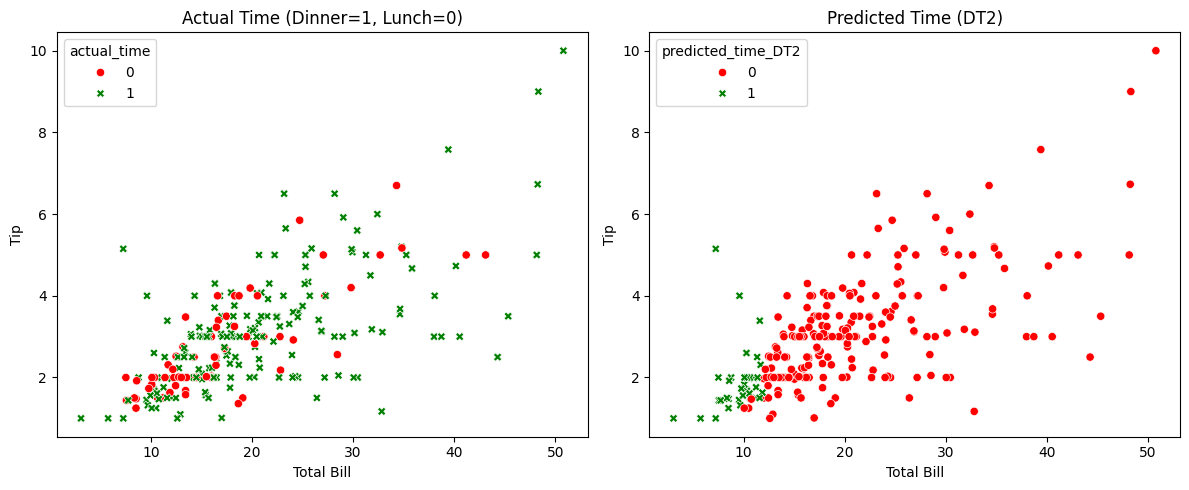

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset locally
df = sns.load_dataset("tips")  # works if you're online

# Label: 1 = Dinner, 0 = Lunch
df["actual_time"] = (df["time"] == "Dinner").astype(int)

# Decision logic
mask1 = (df["tip"] < 1.5) & (df["total_bill"] < 10)
mask2 = (df["tip"] >= 1.5) & (df["tip"] < 4.5) & (df["total_bill"] < 12)
mask3 = (df["tip"] >= 4.5) & (df["total_bill"] < 19)

df["predicted_time_DT2"] = (mask1 | mask2 | mask3).astype(int)

# ────────────────────────────────
# Plot 1: Actual classification
# Plot 2: Predicted classification
# ────────────────────────────────
plt.figure(figsize=(12, 5))

# Actual
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x="total_bill",
    y="tip",
    hue="actual_time",
    palette={0: "red", 1: "green"},
    style="actual_time"
)
plt.title("Actual Time (Dinner=1, Lunch=0)")
plt.xlabel("Total Bill")
plt.ylabel("Tip")

# Predicted
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x="total_bill",
    y="tip",
    hue="predicted_time_DT2",
    palette={0: "red", 1: "green"},
    style="predicted_time_DT2"
)
plt.title("Predicted Time (DT2)")
plt.xlabel("Total Bill")
plt.ylabel("Tip")

plt.tight_layout()
plt.show()
